In [33]:
# CLASSIFICATION
from numpy import genfromtxt, zeros
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

x = genfromtxt('IrisCSV/iris.csv',delimiter=',',usecols=(0,1,2,3))
y = genfromtxt('IrisCSV/iris.csv',delimiter=',',usecols=(4),dtype=str)

t = zeros(len(y))
t[y == 'setosa'] = 1
t[y == 'versicolor'] = 2
t[y == 'virginica'] = 3

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score,plot_roc_curve,auc,roc_curve
(X_train, X_test, y_train, y_test) = train_test_split(x,t,test_size=0.5, random_state=0)

In [35]:
def prediction_score(classifier):
    y_pred = classifier.predict(X_test)
    score = classifier.score(X_test,y_test)
    print("Prediction :\n %s"%y_pred)
    print("Score = %s"%score)

In [36]:
def auc_score(predictionProbability):
    return roc_auc_score(y_test,predictionProbability, multi_class='ovr')

In [37]:
def roc_curvee(prediction_probability):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test, prediction_probability[:, i],pos_label=i+1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    lw = 2
    colors = ['brown', 'red', 'green']
    targets = ['setosa', 'versicolor','virginica']
    for i in range(3):
        plt.plot(fpr[i], tpr[i], color=colors[i],
                 lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'.format(targets[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

---RANDOM FOREST MODEL---
Prediction :
 [3. 2. 1. 3. 1. 3. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 3. 2. 1. 1.
 3. 1. 1. 2. 2. 1. 3. 2. 1. 3. 3. 2. 1. 3. 2. 2. 3. 1. 3. 1. 1. 2. 3. 3.
 2. 3. 2. 3. 2. 2. 3. 2. 2. 3. 2. 3. 2. 1. 3. 2. 2. 2. 2. 3. 1. 1. 3. 2.
 1. 1. 2.]
Score = 0.9333333333333333
CONFUSION MATRIX : 
 [[21  0  0]
 [ 0 29  1]
 [ 0  4 20]]
AUC Score = 0.9967356572258533


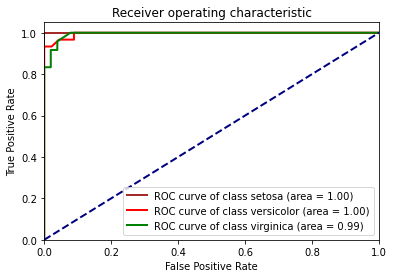

In [38]:
# RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
classifierR=RandomForestClassifier()
classifierR.fit(X_train,y_train)
print("---RANDOM FOREST MODEL---")
# PREDICTION
prediction_score(classifierR)

#  CONFUSION MATRIX
y_predR = classifierR.predict(X_test)
print("CONFUSION MATRIX : \n %s"%confusion_matrix(y_test,y_predR))

# AREA UNDER CURVE
R_prediction_probability = classifierR.predict_proba(X_test)
print("AUC Score = %s"%auc_score(R_prediction_probability))

# ROC CURVE
roc_curvee(R_prediction_probability)


---DECISION TREE MODEL---
Prediction :
 [3. 2. 1. 3. 1. 3. 1. 2. 2. 2. 3. 2. 2. 2. 2. 1. 2. 2. 1. 1. 3. 2. 1. 1.
 3. 1. 1. 2. 2. 1. 3. 2. 1. 3. 3. 2. 1. 3. 2. 2. 3. 1. 3. 1. 1. 2. 3. 3.
 2. 3. 2. 3. 2. 2. 3. 3. 2. 3. 2. 3. 2. 1. 3. 2. 2. 2. 2. 3. 1. 1. 3. 2.
 1. 1. 2.]
Score = 0.96
CONFUSION MATRIX : 
 [[21  0  0]
 [ 0 29  1]
 [ 0  4 20]]
AUC Score = 0.969880174291939


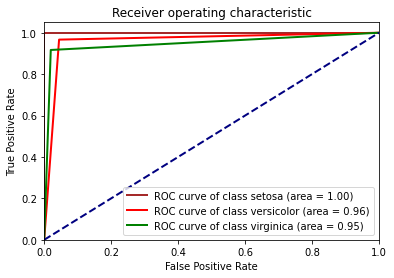

In [39]:
# DECISION TREE MODEL
# PREDICTION
from sklearn.tree import  DecisionTreeClassifier

classifierD=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifierD.fit(X_train,y_train)
print("---DECISION TREE MODEL---")

# PREDICTION
prediction_score(classifierD)

#  CONFUSION MATRIX
y_predD = classifierR.predict(X_test)
print("CONFUSION MATRIX : \n %s"%confusion_matrix(y_test,y_predD))

# AREA UNDER CURVE
D_prediction_probability = classifierD.predict_proba(X_test)
print("AUC Score = %s"%auc_score(D_prediction_probability))

# ROS CURVE
roc_curvee(D_prediction_probability)

---KNN MODEL---
Prediction :
 [3. 2. 1. 3. 1. 3. 1. 2. 2. 2. 3. 2. 2. 2. 2. 1. 2. 2. 1. 1. 3. 2. 1. 1.
 2. 1. 1. 2. 2. 1. 3. 2. 1. 3. 3. 2. 1. 3. 2. 2. 3. 1. 3. 1. 1. 2. 3. 3.
 2. 3. 2. 3. 2. 2. 3. 2. 2. 3. 2. 3. 2. 1. 3. 2. 2. 2. 2. 3. 1. 1. 3. 2.
 1. 1. 2.]
Score = 0.9333333333333333
CONFUSION MATRIX : 
 [[21  0  0]
 [ 0 29  1]
 [ 0  4 20]]
AUC Score = 0.9924709513435004


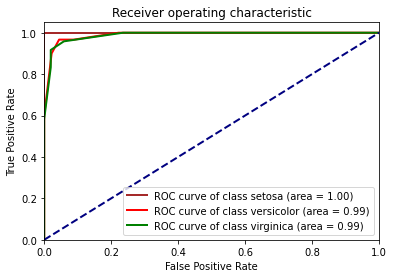

In [26]:
# KNN MODEL
# PREDICTION
from sklearn.neighbors import KNeighborsClassifier
classifierKnn = KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
classifierKnn.fit(X_train,y_train)
print("---KNN MODEL---")

# PREDICTION
prediction_score(classifierKnn)

#  CONFUSION MATRIX
y_predK = classifierKnn.predict(X_test)
print("CONFUSION MATRIX : \n %s"%confusion_matrix(y_test,y_predK))

# AREA UNDER CURVE
K_prediction_probability = classifierKnn.predict_proba(X_test)
print("AUC Score = %s"%auc_score(K_prediction_probability))

# ROS CURVE
roc_curvee(K_prediction_probability)

Prediction :
 [3. 2. 1. 3. 1. 3. 1. 3. 2. 2. 3. 3. 2. 2. 2. 1. 2. 2. 1. 1. 3. 2. 1. 1.
 3. 1. 1. 2. 2. 1. 3. 2. 1. 3. 3. 2. 1. 3. 2. 2. 3. 1. 3. 1. 1. 2. 3. 3.
 2. 3. 2. 3. 3. 2. 3. 3. 2. 3. 3. 3. 3. 1. 3. 2. 2. 2. 2. 3. 1. 1. 3. 2.
 1. 1. 3.]
Score = 0.88
CONFUSION MATRIX : 
 [[21  0  0]
 [ 0 29  1]
 [ 0  4 20]]
AUC Score = 0.9924709513435004


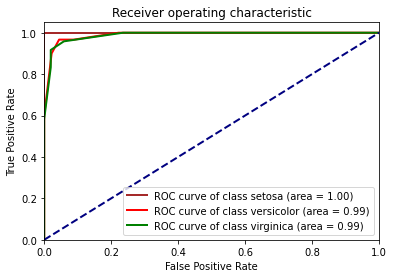

In [27]:
# LOGISTIC REGRATION MODEL
from sklearn.linear_model import LogisticRegression
classifierLog=LogisticRegression(multi_class='ovr')
classifierLog.fit(X_train,y_train)
# PREDICTION
prediction_score(classifierLog)

#  CONFUSION MATRIX
y_predL = classifierKnn.predict(X_test)
print("CONFUSION MATRIX : \n %s"%confusion_matrix(y_test,y_predL))

# AREA UNDER CURVE
L_prediction_probability = classifierKnn.predict_proba(X_test)
print("AUC Score = %s"%auc_score(L_prediction_probability))

# ROC CURVE
roc_curvee(L_prediction_probability)

---LINEAR DISCRIMINANT ANALYSIS
Prediction :
 [3. 2. 1. 3. 1. 3. 1. 2. 2. 2. 3. 2. 2. 2. 2. 1. 2. 2. 1. 1. 3. 2. 1. 1.
 3. 1. 1. 2. 2. 1. 3. 2. 1. 3. 3. 2. 1. 3. 2. 2. 3. 1. 3. 1. 1. 2. 3. 3.
 2. 3. 2. 3. 2. 2. 3. 2. 3. 3. 2. 3. 2. 1. 3. 2. 2. 2. 2. 3. 1. 1. 3. 2.
 1. 1. 2.]
Score = 0.96
CONFUSION MATRIX : 
 [[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
AUC Score = 0.9924709513435004


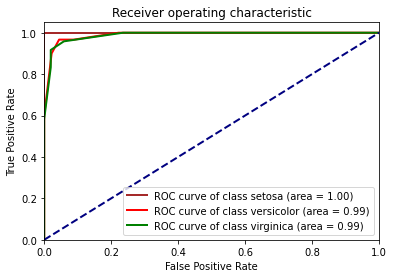

In [28]:
# LINEAR DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifierLin = LinearDiscriminantAnalysis()
classifierLin.fit(X_train,y_train)
print("---LINEAR DISCRIMINANT ANALYSIS")
# PREDICTION
prediction_score(classifierLin)

#  CONFUSION MATRIX
y_predLin = classifierLin.predict(X_test)
print("CONFUSION MATRIX : \n %s"%confusion_matrix(y_test,y_predLin))

# AREA UNDER CURVE
Lin_prediction_probability = classifierKnn.predict_proba(X_test)
print("AUC Score = %s"%auc_score(Lin_prediction_probability))

# ROC CURVE
roc_curvee(Lin_prediction_probability)

---QUADRATIC DISCRIMINANT ANALYSIS---
Prediction :
 [3. 2. 1. 3. 1. 3. 1. 2. 2. 2. 3. 2. 2. 2. 2. 1. 2. 2. 1. 1. 3. 2. 1. 1.
 3. 1. 1. 2. 2. 1. 3. 2. 1. 3. 3. 2. 1. 3. 2. 2. 3. 1. 3. 1. 1. 2. 3. 3.
 2. 3. 2. 3. 2. 2. 3. 2. 3. 3. 2. 3. 2. 1. 3. 2. 2. 2. 2. 3. 1. 1. 3. 2.
 1. 1. 2.]
Score = 0.96
CONFUSION MATRIX : 
 [[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
AUC Score = 0.9924709513435004


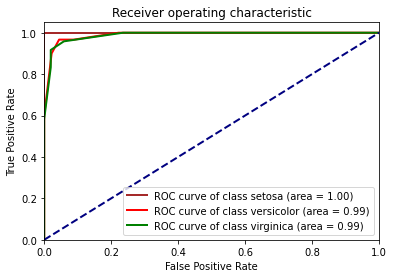

In [30]:
# QUADRATIC DISCRIMINANT ANALYSIS
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifierQuad = QuadraticDiscriminantAnalysis()
classifierQuad.fit(X_train,y_train)
print("---QUADRATIC DISCRIMINANT ANALYSIS---")
# PREDICTION
prediction_score(classifierQuad)

#  CONFUSION MATRIX
y_predQ = classifierLin.predict(X_test)
print("CONFUSION MATRIX : \n %s"%confusion_matrix(y_test,y_predQ))

# AREA UNDER CURVE
Quad_prediction_probability = classifierKnn.predict_proba(X_test)
print("AUC Score = %s"%auc_score(Quad_prediction_probability))

# ROC CURVE
roc_curvee(Quad_prediction_probability)

---BOOSTING ALGORIZM MODEL---
Prediction :
 [3. 2. 1. 3. 1. 3. 1. 2. 2. 2. 3. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1.
 3. 1. 1. 2. 2. 1. 3. 2. 1. 3. 3. 2. 1. 3. 2. 2. 3. 1. 3. 1. 1. 2. 3. 3.
 3. 3. 2. 3. 2. 2. 3. 3. 2. 3. 2. 3. 2. 1. 3. 2. 2. 2. 2. 3. 1. 1. 3. 2.
 1. 1. 2.]
Score = 0.96
CONFUSION MATRIX : 
 [[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]
AUC Score = 0.9924709513435004


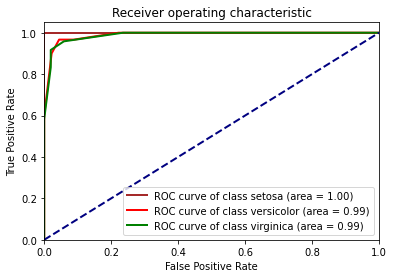

In [31]:
# BOOSTING ALGORIZM MODEL
from sklearn.ensemble import AdaBoostClassifier
classifierBoo = AdaBoostClassifier(n_estimators=50, random_state=0)
classifierBoo.fit(X_train,y_train)
print("---BOOSTING ALGORIZM MODEL---")
# PREDICTION
prediction_score(classifierBoo)

#  CONFUSION MATRIX
y_predB = classifierLin.predict(X_test)
print("CONFUSION MATRIX : \n %s"%confusion_matrix(y_test,y_predB))

# AREA UNDER CURVE
Boo_prediction_probability = classifierKnn.predict_proba(X_test)
print("AUC Score = %s"%auc_score(Boo_prediction_probability))

# ROC CURVE
roc_curvee(Boo_prediction_probability)


In [ ]:
# I CHOOSE LINEAR LINEAR DISCRIMINANT ANALYSIS
# IT IS MORE ACCURACTE